In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

# A. แยก Train, test dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(f'#traning = {X_train.shape[0]}')
print(f'#test = {X_test.shape[0]}')

#traning = 60000
#test = 10000


In [5]:
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


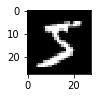

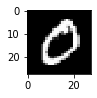

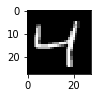

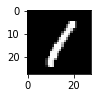

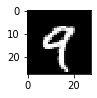

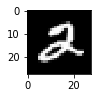

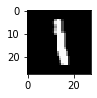

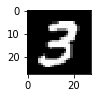

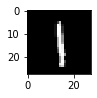

In [6]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

# A2 ทำ model เพื่อ Predict 

In [7]:
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical

In [8]:
NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10

In [9]:
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

In [10]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [11]:
model = models.Sequential()

model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS*NUM_COLS,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

#history = model.fit(X_train, y_train,
       #   batch_size=128,
       #   epochs=10,
       #   verbose=1,
       #   validation_split=0.2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.3202 - accuracy: 0.9028 - val_loss: 0.1263 - val_accuracy: 0.9625
Epoch 2/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.1551 - accuracy: 0.9534 - val_loss: 0.1018 - val_accuracy: 0.9698
Epoch 3/10
60000/60000 [==============================] - 14s 236us/sample - loss: 0.1225 - accuracy: 0.9635 - val_loss: 0.0819 - val_accuracy: 0.9758
Epoch 4/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.1077 - accuracy: 0.9689 - val_loss: 0.0770 - val_accuracy: 0.9770
Epoch 5/10
60000/60000 [==============================] - 14s 240us/sample - loss: 0.0954 - accuracy: 0.9719 - val_loss: 0.0772 - val_accuracy: 0.9790
Epoch 6/10
60000/60000 [==============================] - 15s 249us/sample - loss: 0.0887 - accuracy: 0.9753 - val_loss: 0.0835 - val_accuracy: 0.9773
Epoch 7/10
60000/60000 [====================

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07790994317669901
Test accuracy: 0.9814


# C. Plot

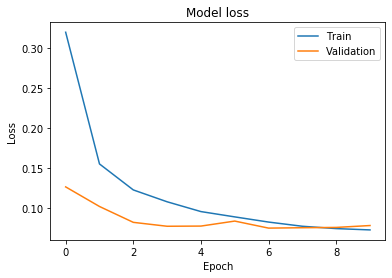

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

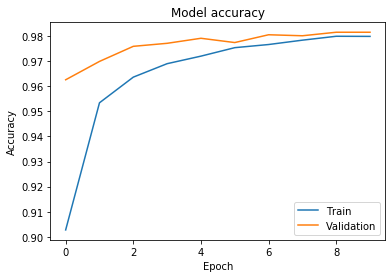

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()